# The Battle of Neighborhoods

## Coffee Shop in Toronto

#### Installing and importing Libraries

In [1]:
!pip install beautifulsoup4
!pip install lxml
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 


from IPython.display import display_html
import pandas as pd
import numpy as np
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                       

#### Importing data Wikipedia

In [2]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup=BeautifulSoup(source,'lxml')
print(soup.title)
from IPython.display import display_html
tab = str(soup.table)
display_html(tab,raw=True)

<title>List of postal codes of Canada: M - Wikipedia</title>


Postal Code,Borough,Neighborhood
M1A,Not assigned,Not assigned
M2A,Not assigned,Not assigned
M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,"Regent Park, Harbourfront"
M6A,North York,"Lawrence Manor, Lawrence Heights"
M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
M8A,Not assigned,Not assigned
M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
M1B,Scarborough,"Malvern, Rouge"


In [3]:
dfs = pd.read_html(tab)
df=dfs[0]
df.head(12)

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


#### Processing the cells that have an assigned borough.

In [4]:
df1 = df[df.Borough != 'Not assigned']

#### Combining the neighborhoods with same Postal Code

In [5]:
df2 = df1.groupby(['Postal Code','Borough'], sort=False).agg(', '.join)
df2.rename(columns={'Postal Code':'Postcode'}, inplace=True)
df2.reset_index(inplace=True)
df2

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


#### If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.

In [6]:
df2['Neighborhood'] = np.where(df2['Neighborhood'] == 'Not assigned',df2['Borough'], df2['Neighborhood'])

df2

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [7]:
# Check if we still have any Neighborhoods that are Not Assigned
df2.loc[df2['Borough'].isin(["Not assigned"])]

,Postal Code,Borough,Neighborhood


 #### Use the .shape method to print the number of rows of your dataframe.

In [8]:
df2.shape

(103, 3)

#### Importing the latitudes and longitudes of neighborhoods in Canada

In [9]:
lat_lon = pd.read_csv('https://cocl.us/Geospatial_data')

lat_lon.head(11)

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [12]:
df2.set_index('Postal Code')
lat_lon.set_index('Postal Code')
df3 = pd.merge(df2,lat_lon, on='Postal Code')
df3.head(11)

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [13]:
# lets find out how many neighborhoods in each borough
df.groupby('Borough').count()['Neighborhood']

Borough
Central Toronto      9
Downtown Toronto    19
East Toronto         5
East York            5
Etobicoke           12
Mississauga          1
North York          24
Not assigned        77
Scarborough         17
West Toronto         6
York                 5
Name: Neighborhood, dtype: int64

In [14]:
#Create list with the Boroughs (to be used later)
boroughs = df3['Borough'].unique().tolist()

#### Defining an instance of the geocoder

In [15]:
address = 'Toronto, ON, Canada'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto, ON, Canada are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto, ON, Canada are 43.6534817, -79.3839347.


In [16]:
# This will color categorize each borough
borough_color = {}
for borough in boroughs:
    borough_color[borough]= '#%02X%02X%02X' % tuple(np.random.choice(range(256), size=3)) #Random color

####  Create map of Toronto using latitude and longitude values and add markers to map

In [17]:
map_toronto= folium.Map(location=[latitude, longitude], zoom_start=10)


for lat, lng, borough, neighborhood in zip(df3['Latitude'], df3['Longitude'], df3['Borough'], df3['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=borough_color[borough],
        fill=True,
        fill_color=borough_color[borough],
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

#### Define Foursquare Credentials and Version

In [18]:
CLIENT_ID = 'YKWZTONNZ0J2XGRD2JXGIX3GOU4H4WCUYTUH3E40J0TMOGTY'
CLIENT_SECRET = '0PQWEIGLJ5XO54GFNBRMDLUALD4R4LQNIP3JJX4J0VCZZULP' 
VERSION = '20180605' # Foursquare API version

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YKWZTONNZ0J2XGRD2JXGIX3GOU4H4WCUYTUH3E40J0TMOGTY
CLIENT_SECRET:0PQWEIGLJ5XO54GFNBRMDLUALD4R4LQNIP3JJX4J0VCZZULP


#### Creating a function to explore all the neighborhoods

In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [20]:
toronto_venues = getNearbyVenues(names=df3['Neighborhood'],
                                   latitudes=df3['Latitude'],
                                   longitudes=df3['Longitude']
                                  )
toronto_venues.head()

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
4,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop


In [21]:
toronto_venues.shape

(2128, 7)

In [22]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,5,5,5,5,5,5
"Alderwood, Long Branch",8,8,8,8,8,8
"Bathurst Manor, Wilson Heights, Downsview North",20,20,20,20,20,20
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",23,23,23,23,23,23
Berczy Park,58,58,58,58,58,58
"Birch Cliff, Cliffside West",4,4,4,4,4,4
"Brockton, Parkdale Village, Exhibition Place",24,24,24,24,24,24
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",19,19,19,19,19,19


In [23]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 275 uniques categories.


In [24]:
print("The Venue Categories are", toronto_venues['Venue Category'].unique())

The Venue Categories are ['Park' 'Food & Drink Shop' 'Hockey Arena' 'Portuguese Restaurant'
 'Coffee Shop' 'French Restaurant' 'Intersection' 'Bakery'
 'Distribution Center' 'Spa' 'Pub' 'Restaurant' 'Breakfast Spot'
 'Gym / Fitness Center' 'Historic Site' 'Farmers Market'
 'Performing Arts Venue' 'Chocolate Shop' 'Dessert Shop' 'Café'
 'Yoga Studio' 'Theater' 'Shoe Store' 'Event Space' 'Ice Cream Shop'
 'Art Gallery' 'Cosmetics Shop' 'Electronics Store' 'Bank' 'Beer Store'
 'Hotel' 'Health Food Store' 'Antique Shop' 'Boutique'
 'Furniture / Home Store' 'Vietnamese Restaurant' 'Clothing Store'
 'Accessories Store' 'Miscellaneous Shop' 'Italian Restaurant'
 'Sushi Restaurant' 'Creperie' 'Beer Bar' 'Arts & Crafts Store'
 'Burrito Place' 'Mexican Restaurant' 'Hobby Shop' 'Diner'
 'Discount Store' 'Fried Chicken Joint' 'Japanese Restaurant'
 'Smoothie Shop' 'Sandwich Place' 'Gym' 'Bar' 'College Auditorium'
 'General Entertainment' 'Fast Food Restaurant' 'Caribbean Restaurant'
 'Athletics & 

### Are there Coffee Shop in Toronto?

In [25]:
"Coffee Shop" in toronto_venues['Venue Category'].unique()

True

#### Analysing each Neighborhood

In [26]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot.head()

,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
toronto_onehot.shape

(2128, 275)

In [28]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.0,0.0000,0.000000,0.0000,0.0000,0.000,0.0000,0.0000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000
1,"Alderwood, Long Branch",0.0,0.0000,0.000000,0.0000,0.0000,0.000,0.0000,0.0000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0000,0.000000,0.0000,0.0000,0.000,0.0000,0.0000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000
3,Bayview Village,0.0,0.0000,0.000000,0.0000,0.0000,0.000,0.0000,0.0000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000
4,"Bedford Park, Lawrence Manor East",0.0,0.0000,0.000000,0.0000,0.0000,0.000,0.0000,0.0000,0.043478,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000
5,Berczy Park,0.0,0.0000,0.000000,0.0000,0.0000,0.000,0.0000,0.0000,0.000000,...,0.0,0.017241,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000
6,"Birch Cliff, Cliffside West",0.0,0.0000,0.000000,0.0000,0.0000,0.000,0.0000,0.0000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000
7,"Brockton, Parkdale Village, Exhibition Place",0.0,0.0000,0.000000,0.0000,0.0000,0.000,0.0000,0.0000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000
8,"Business reply mail Processing Centre, South C...",0.0,0.0000,0.000000,0.0000,0.0000,0.000,0.0000,0.0000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.052632
9,"CN Tower, King and Spadina, Railway Lands, Har...",0.0,0.0000,0.062500,0.0625,0.0625,0.125,0.1875,0.0625,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000


In [29]:
cofshop = toronto_grouped[["Neighborhood","Coffee Shop"]]
cofshop.head() #.head() shows the first five rows only

,Neighborhood,Coffee Shop
0,Agincourt,0.000000
1,"Alderwood, Long Branch",0.125000
2,"Bathurst Manor, Wilson Heights, Downsview North",0.100000
3,Bayview Village,0.000000
4,"Bedford Park, Lawrence Manor East",0.086957


### Cluster Neighborhoods
#### Run k-means to cluster the neighborhood

In [30]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=15, random_state=8)
X = cofshop.drop(['Neighborhood'], axis=1)

In [31]:
kmeans.fit(X)
kmeans.labels_[0:10]

array([1, 2, 2, 1, 2, 2, 1, 2, 1, 2], dtype=int32)

In [32]:
def get_inertia(n_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=15, random_state=8)
    km.fit(X)
    return km.inertia_

In [33]:
scores = [get_inertia(x) for x in range(2, 21)]

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=[10, 8])
sns.lineplot(x=range(2, 21), y=scores, color='r')
plt.title("K vs Error")
plt.xticks(range(2, 21))
plt.xlabel("K")
plt.ylabel("Error")

Text(0, 0.5, 'Error')

In [35]:
kclusters = 4

toronto_grouped_clustering = cofshop.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 2, 3, 0, 3, 3, 0, 3, 0, 3], dtype=int32)

In [36]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
to_merged = cofshop.copy()

# add clustering labels
to_merged["Cluster Labels"] = kmeans.labels_

In [37]:
to_merged.head()

,Neighborhood,Coffee Shop,Cluster Labels
0,Agincourt,0.000000,0
1,"Alderwood, Long Branch",0.125000,2
2,"Bathurst Manor, Wilson Heights, Downsview North",0.100000,3
3,Bayview Village,0.000000,0
4,"Bedford Park, Lawrence Manor East",0.086957,3


In [38]:
 #merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
to_merged = to_merged.join(toronto_venues.set_index("Neighborhood"), on="Neighborhood")

print(to_merged.shape)
to_merged.head()

(2128, 9)


,Neighborhood,Coffee Shop,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agincourt,0.0,0,43.7942,-79.262029,Panagio's Breakfast & Lunch,43.792370,-79.260203,Breakfast Spot
0,Agincourt,0.0,0,43.7942,-79.262029,Twilight,43.791999,-79.258584,Lounge
0,Agincourt,0.0,0,43.7942,-79.262029,El Pulgarcito,43.792648,-79.259208,Latin American Restaurant
0,Agincourt,0.0,0,43.7942,-79.262029,Mark's,43.791179,-79.259714,Clothing Store
0,Agincourt,0.0,0,43.7942,-79.262029,Commander Arena,43.794867,-79.267989,Skating Rink


In [39]:
# sort the results by Cluster Labels
print(to_merged.shape)
to_merged.sort_values(["Cluster Labels"], inplace=True)
to_merged

(2128, 9)


,Neighborhood,Coffee Shop,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agincourt,0.000000,0,43.794200,-79.262029,Panagio's Breakfast & Lunch,43.792370,-79.260203,Breakfast Spot
36,"High Park, The Junction South",0.000000,0,43.661608,-79.464763,nodo,43.665303,-79.465621,Italian Restaurant
36,"High Park, The Junction South",0.000000,0,43.661608,-79.464763,Lithuania Park,43.658667,-79.463038,Park
34,"Guildwood, Morningside, West Hill",0.000000,0,43.763573,-79.188711,Eggsmart,43.767800,-79.190466,Breakfast Spot
34,"Guildwood, Morningside, West Hill",0.000000,0,43.763573,-79.188711,Lawrence Ave E & Kingston Rd,43.767704,-79.189490,Intersection
34,"Guildwood, Morningside, West Hill",0.000000,0,43.763573,-79.188711,Woburn Medical Centre,43.766631,-79.192286,Medical Center
34,"Guildwood, Morningside, West Hill",0.000000,0,43.763573,-79.188711,Enterprise Rent-A-Car,43.764076,-79.193406,Rental Car Location
34,"Guildwood, Morningside, West Hill",0.000000,0,43.763573,-79.188711,Big Bite Burrito,43.766299,-79.190720,Mexican Restaurant
34,"Guildwood, Morningside, West Hill",0.000000,0,43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store
34,"Guildwood, Morningside, West Hill",0.000000,0,43.763573,-79.188711,RBC Royal Bank,43.766790,-79.191151,Bank


In [40]:
to_merged['Venue Category'].value_counts()['Coffee Shop']

179

In [41]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(to_merged['Neighborhood Latitude'], to_merged['Neighborhood Longitude'], to_merged['Neighborhood'], to_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [42]:
cofshop["Cluster Labels"] = kmeans.labels_
cofshop.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Neighborhood,Coffee Shop,Cluster Labels
0,Agincourt,0.000000,0
1,"Alderwood, Long Branch",0.125000,2
2,"Bathurst Manor, Wilson Heights, Downsview North",0.100000,3
3,Bayview Village,0.000000,0
4,"Bedford Park, Lawrence Manor East",0.086957,3


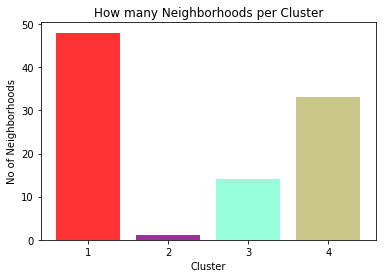

In [43]:
objects = (1,2,3,4)
y_pos = np.arange(len(objects))
performance = cofshop['Cluster Labels'].value_counts().to_frame().sort_index(ascending=True)
perf = performance['Cluster Labels'].tolist()
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'purple','aquamarine', 'darkkhaki'])
plt.xticks(y_pos, objects)
plt.ylabel('No of Neighborhoods')
plt.xlabel('Cluster')
plt.title('How many Neighborhoods per Cluster')

plt.show()

In [44]:
# How many neighborhoods in each cluster
cofshop['Cluster Labels'].value_counts()

0    48
3    33
2    14
1     1
Name: Cluster Labels, dtype: int64

In [45]:
# This will create a dataframe with borough of each neighborhood which we will merge with each cluster dataframe
df_new = df3[['Borough', 'Neighborhood']]
df_new.head()

,Borough,Neighborhood
0,North York,Parkwoods
1,North York,Victoria Village
2,Downtown Toronto,"Regent Park, Harbourfront"
3,North York,"Lawrence Manor, Lawrence Heights"
4,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [46]:
cluster1 = to_merged.loc[to_merged['Cluster Labels'] == 0]
df_cluster1 = pd.merge(df_new, cluster1, on='Neighborhood')
df_cluster1

,Borough,Neighborhood,Coffee Shop,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,North York,Parkwoods,0.0,0,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
1,North York,Parkwoods,0.0,0,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
2,Scarborough,"Malvern, Rouge",0.0,0,43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
3,East York,"Parkview Hill, Woodbine Gardens",0.0,0,43.706397,-79.309937,Jawny Bakers,43.705783,-79.312913,Gastropub
4,East York,"Parkview Hill, Woodbine Gardens",0.0,0,43.706397,-79.309937,East York Gymnastics,43.710654,-79.309279,Gym / Fitness Center
5,East York,"Parkview Hill, Woodbine Gardens",0.0,0,43.706397,-79.309937,TD Canada Trust,43.705740,-79.312270,Bank
6,East York,"Parkview Hill, Woodbine Gardens",0.0,0,43.706397,-79.309937,Shoppers Drug Mart,43.705933,-79.312825,Pharmacy
7,East York,"Parkview Hill, Woodbine Gardens",0.0,0,43.706397,-79.309937,TKTO - Toronto Knife Throwing Organization,43.709966,-79.313411,Athletics & Sports
8,East York,"Parkview Hill, Woodbine Gardens",0.0,0,43.706397,-79.309937,Harvey's,43.708136,-79.314105,Fast Food Restaurant
9,East York,"Parkview Hill, Woodbine Gardens",0.0,0,43.706397,-79.309937,Venice Pizza,43.705921,-79.313957,Pizza Place


In [49]:
df_cluster1['Venue Category'].value_counts()

Park                         30
Grocery Store                18
Café                         12
Bakery                       12
Bank                         11
Pizza Place                   9
Fast Food Restaurant          9
Athletics & Sports            7
Pharmacy                      7
Bar                           6
Sandwich Place                6
Baseball Field                6
Hotel                         6
Gym / Fitness Center          6
Bus Line                      5
Discount Store                5
Breakfast Spot                5
Italian Restaurant            4
Food Truck                    4
Shopping Mall                 4
Fried Chicken Joint           4
Airport                       4
Snack Place                   4
Smoke Shop                    4
Liquor Store                  4
Skating Rink                  4
Brewery                       4
Trail                         4
Business Service              4
Thai Restaurant               4
                             ..
Hakka Re

In [50]:
# Purple 
cluster2=to_merged.loc[to_merged['Cluster Labels'] == 1]
df_cluster2 = pd.merge(df_new, cluster2, on='Neighborhood')
df_cluster2

,Borough,Neighborhood,Coffee Shop,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Scarborough,Woburn,0.666667,1,43.770992,-79.216917,Starbucks,43.770037,-79.221156,Coffee Shop
1,Scarborough,Woburn,0.666667,1,43.770992,-79.216917,Korean Grill House,43.770812,-79.214502,Korean Restaurant
2,Scarborough,Woburn,0.666667,1,43.770992,-79.216917,Tim Hortons,43.770827,-79.223078,Coffee Shop


In [51]:
df_cluster2['Venue Category'].value_counts()

Coffee Shop          2
Korean Restaurant    1
Name: Venue Category, dtype: int64

In [68]:
df_cluster2['Borough'].value_counts()

Scarborough    3
Name: Borough, dtype: int64

In [52]:
 #Blue
cluster3 = to_merged.loc[to_merged['Cluster Labels'] == 2]
df_cluster3 = pd.merge(df_new, cluster3, on='Neighborhood')
df_cluster3

,Borough,Neighborhood,Coffee Shop,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,North York,Victoria Village,0.200000,2,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
1,North York,Victoria Village,0.200000,2,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
2,North York,Victoria Village,0.200000,2,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop
3,North York,Victoria Village,0.200000,2,43.725882,-79.315572,Eglinton Ave E & Sloane Ave/Bermondsey Rd,43.726086,-79.313620,Intersection
4,North York,Victoria Village,0.200000,2,43.725882,-79.315572,The Frig,43.727051,-79.317418,French Restaurant
5,Downtown Toronto,"Regent Park, Harbourfront",0.159091,2,43.654260,-79.360636,GW General,43.650495,-79.357538,Antique Shop
6,Downtown Toronto,"Regent Park, Harbourfront",0.159091,2,43.654260,-79.360636,The Healthy Road,43.656265,-79.357119,Health Food Store
7,Downtown Toronto,"Regent Park, Harbourfront",0.159091,2,43.654260,-79.360636,Residence & Conference Centre,43.653040,-79.357040,Hotel
8,Downtown Toronto,"Regent Park, Harbourfront",0.159091,2,43.654260,-79.360636,Savoury Grounds,43.656821,-79.358970,Coffee Shop
9,Downtown Toronto,"Regent Park, Harbourfront",0.159091,2,43.654260,-79.360636,The Beer Store,43.657773,-79.357463,Beer Store


In [53]:
df_cluster3['Venue Category'].value_counts()

Coffee Shop                  50
Café                         11
Park                         10
Sandwich Place               10
Pizza Place                   9
Hotel                         8
Discount Store                7
Italian Restaurant            7
Japanese Restaurant           6
Chinese Restaurant            5
Aquarium                      5
Fried Chicken Joint           5
Bar                           5
Restaurant                    5
Pub                           4
Bank                          4
Theater                       4
Sushi Restaurant              4
Dessert Shop                  4
Pharmacy                      4
Department Store              4
Bakery                        4
Sporting Goods Shop           3
Intersection                  3
Brewery                       3
Yoga Studio                   3
Ice Cream Shop                3
Scenic Lookout                3
Bubble Tea Shop               3
Middle Eastern Restaurant     3
                             ..
Lounge  

In [71]:
df_cluster3['Neighborhood'].value_counts()

Harbourfront East, Union Station, Toronto Islands                100
Central Bay Street                                                67
Regent Park, Harbourfront                                         44
Queen's Park, Ontario Provincial Government                       32
Canada Post Gateway Processing Centre                             13
Steeles West, L'Amoreaux West                                     12
Alderwood, Long Branch                                             8
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood      8
Willowdale, Willowdale West                                        7
Westmount                                                          7
Northwood Park, York University                                    6
Kennedy Park, Ionview, East Birchmount Park                        6
Victoria Village                                                   5
East Toronto, Broadview North (Old East York)                      4
Name: Neighborhood, dtype: int64

In [54]:
# Turquoise
cluster4 = to_merged.loc[to_merged['Cluster Labels'] == 3]
df_cluster4 = pd.merge(df_new, cluster4, on='Neighborhood')
df_cluster4

,Borough,Neighborhood,Coffee Shop,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,North York,"Lawrence Manor, Lawrence Heights",0.083333,3,43.718518,-79.464763,Tim Hortons,43.719427,-79.467995,Coffee Shop
1,North York,"Lawrence Manor, Lawrence Heights",0.083333,3,43.718518,-79.464763,Orfus Road Shopping Outlets,43.719045,-79.460849,Clothing Store
2,North York,"Lawrence Manor, Lawrence Heights",0.083333,3,43.718518,-79.464763,Lac Vien Vietnamese Restaurant,43.721259,-79.468472,Vietnamese Restaurant
3,North York,"Lawrence Manor, Lawrence Heights",0.083333,3,43.718518,-79.464763,Kitchen Stuff Plus (Clearance Outlet),43.719096,-79.462675,Furniture / Home Store
4,North York,"Lawrence Manor, Lawrence Heights",0.083333,3,43.718518,-79.464763,Roots,43.718214,-79.463893,Boutique
5,North York,"Lawrence Manor, Lawrence Heights",0.083333,3,43.718518,-79.464763,Ardene Shoes Outlet,43.718892,-79.461344,Accessories Store
6,North York,"Lawrence Manor, Lawrence Heights",0.083333,3,43.718518,-79.464763,Bluenotes,43.718054,-79.463200,Clothing Store
7,North York,"Lawrence Manor, Lawrence Heights",0.083333,3,43.718518,-79.464763,Rinx Real Entertainment Centre,43.717842,-79.462231,Event Space
8,North York,"Lawrence Manor, Lawrence Heights",0.083333,3,43.718518,-79.464763,Bluenotes,43.718846,-79.465906,Clothing Store
9,North York,"Lawrence Manor, Lawrence Heights",0.083333,3,43.718518,-79.464763,Barrymore,43.715890,-79.468188,Furniture / Home Store


In [55]:
df_cluster4['Venue Category'].value_counts()

Coffee Shop                      129
Café                              78
Restaurant                        58
Japanese Restaurant               35
Italian Restaurant                34
Pizza Place                       32
Hotel                             32
Clothing Store                    32
Gym                               29
Bakery                            27
Sandwich Place                    24
American Restaurant               24
Sushi Restaurant                  22
Park                              22
Seafood Restaurant                20
Pub                               19
Grocery Store                     18
Bar                               17
Fast Food Restaurant              17
Vegetarian / Vegan Restaurant     15
Thai Restaurant                   15
Beer Bar                          15
Gastropub                         15
Ice Cream Shop                    15
Greek Restaurant                  15
Cocktail Bar                      14
Breakfast Spot                    14
B

In [72]:
df_cluster4['Neighborhood'].value_counts()

First Canadian Place, Underground city                                                                        100
Commerce Court, Victoria Hotel                                                                                100
Garden District, Ryerson                                                                                      100
Toronto Dominion Centre, Design Exchange                                                                      100
Stn A PO Boxes                                                                                                 97
Richmond, Adelaide, King                                                                                       93
Church and Wellesley                                                                                           80
St. James Town                                                                                                 78
Fairview, Henry Farm, Oriole                                                            

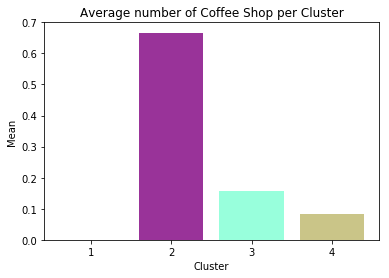

In [56]:
clusters_mean = [df_cluster1['Coffee Shop'].mean(),df_cluster2['Coffee Shop'].mean(),df_cluster3['Coffee Shop'].mean(),
                 df_cluster4['Coffee Shop'].mean()]
objects = (1,2,3,4)
y_pos = np.arange(len(objects))
perf = clusters_mean
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'purple','aquamarine', 'darkkhaki'])
plt.xticks(y_pos, objects)
plt.ylabel('Mean')
plt.xlabel('Cluster')
plt.title('Average number of Coffee Shop per Cluster')

plt.show()

In [62]:
df_cluster1['Coffee Shop'].mean()

0.0

In [63]:
df_cluster2['Coffee Shop'].mean()

0.6666666666666666

In [64]:
df_cluster3['Coffee Shop'].mean()

0.15673981191222613

In [65]:
df_cluster4['Coffee Shop'].mean()

0.08425865447420068